In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scipy

import sys
sys.path.append('..')

This notebook is a guide for the neural networks based models of the library of the project "". :)

Météo-France, CNRS, CNRM, Centre d’Etudes de la Neige \
Léo Catteau, Spring 2025

### Contents:
* [Linear](#first-subbullet)
* [MLP](#second-bullet)
* [Autoencoder](#third-bullet)
* [GRIN](#fourth-bullet)

All neural networks based models are trained following the same procedure implemented by the Filler. 

### Linear training <a class="anchor" id="first-bullet"></a>

In [2]:
from data_provider.data_provider import DataProvider
from models.linear import linear
from trainer.Filler import Filler

from types import SimpleNamespace

/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [5]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.has_predictors = False
data_kwargs.scaler = None
data_kwargs.batch_size = 50
data_kwargs.mask_length = 24*7*3
data_kwargs.mask_proba = 0.75
data_kwargs.window = 24
data_kwargs.horizon = 0

data_provider = DataProvider(data_kwargs)
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(seq_dim=data_provider.data.n_nodes)
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 1e-4
filler_kwargs.epochs = 100
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(linear, model_kwargs, filler_kwargs)

before loading dataset, path:  ../../datasets/bdclim_safran_2023-2024.nc
dataset loaded
total stations:  2303  remaining stations:  1654  removing stations with only NaN values.
device:  cpu


/Users/leocatteau/Desktop/EPFL/Météo-France/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)


device:  cpu


In [6]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)
filler.save_model('../trained_models/linear.pt')

start training
Epoch 1/100, Train Loss: 38.75477791, Test Loss: 23.87651126, time: 0.94s
Epoch 2/100, Train Loss: 16.13974190, Test Loss: 20.65444692, time: 2.05s
Epoch 3/100, Train Loss: 14.68332338, Test Loss: 21.24275271, time: 3.25s
Epoch 4/100, Train Loss: 13.62599087, Test Loss: 18.48165862, time: 4.47s
Epoch 5/100, Train Loss: 12.07947230, Test Loss: 15.54928207, time: 5.50s
Epoch 6/100, Train Loss: 10.74006486, Test Loss: 13.62060261, time: 6.39s
Epoch 7/100, Train Loss: 9.88118386, Test Loss: 12.78723939, time: 7.29s
Epoch 8/100, Train Loss: 9.32131004, Test Loss: 12.29571342, time: 8.14s
Epoch 9/100, Train Loss: 8.81040931, Test Loss: 12.16079775, time: 8.99s
Epoch 10/100, Train Loss: 8.46048093, Test Loss: 11.86196613, time: 9.83s
Epoch 11/100, Train Loss: 8.01848555, Test Loss: 11.42744732, time: 10.66s
Epoch 12/100, Train Loss: 7.72818387, Test Loss: 11.17746226, time: 11.49s
Epoch 13/100, Train Loss: 7.43247199, Test Loss: 10.95825609, time: 12.35s
Epoch 14/100, Train Los

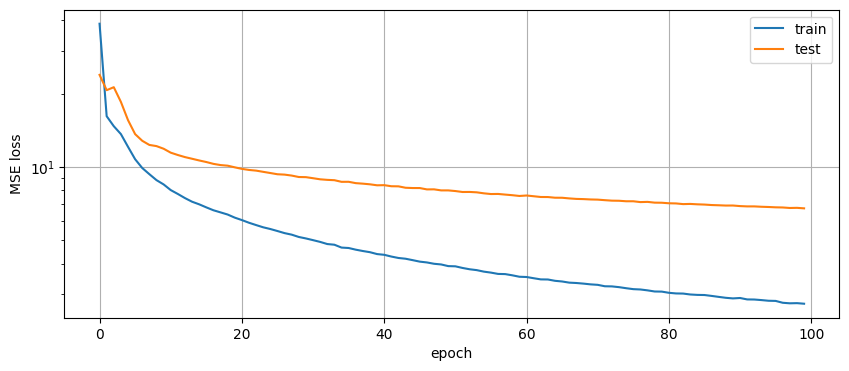

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
# plt.ylim(0.01, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()

### MLP training <a class="anchor" id="second-bullet"></a>

In [6]:
from data_provider.data_provider import DataProvider
from models.MLP import MLP
from trainer.Filler import Filler

from types import SimpleNamespace

In [7]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.has_predictors = False
data_kwargs.scaler = None
data_kwargs.batch_size = 50
data_kwargs.mask_length = 24*7*3
data_kwargs.mask_proba = 0.5
data_kwargs.window = 24
data_kwargs.horizon = 0

data_provider = DataProvider(data_kwargs)
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(seq_dim=data_provider.data.n_nodes, hidden_dim=2*data_provider.data.n_nodes)
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 1e-4
filler_kwargs.epochs = 100
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(MLP, model_kwargs, filler_kwargs)

device:  cpu
device:  cpu


/Users/leocatteau/Desktop/EPFL/Météo-France/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)


In [8]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)
filler.save_model('../trained_models/MLP.pt')

start training
Epoch 1/100, Train Loss: 6.39889932, Test Loss: 5.29665248, time: 0.65s
Epoch 2/100, Train Loss: 3.92578286, Test Loss: 4.15724023, time: 1.29s
Epoch 3/100, Train Loss: 3.26557434, Test Loss: 3.98646561, time: 2.01s
Epoch 4/100, Train Loss: 3.01737809, Test Loss: 3.93429478, time: 2.68s
Epoch 5/100, Train Loss: 2.82195592, Test Loss: 3.84596181, time: 3.34s
Epoch 6/100, Train Loss: 2.66916060, Test Loss: 3.73640784, time: 4.02s
Epoch 7/100, Train Loss: 2.54859316, Test Loss: 3.62655083, time: 4.66s
Epoch 8/100, Train Loss: 2.44178349, Test Loss: 3.52655045, time: 5.34s
Epoch 9/100, Train Loss: 2.34366044, Test Loss: 3.43782981, time: 6.00s
Epoch 10/100, Train Loss: 2.24383071, Test Loss: 3.33992354, time: 6.66s
Epoch 11/100, Train Loss: 2.15426871, Test Loss: 3.25287795, time: 7.37s
Epoch 12/100, Train Loss: 2.06337205, Test Loss: 3.16592789, time: 8.01s
Epoch 13/100, Train Loss: 1.98198625, Test Loss: 3.07262874, time: 8.65s
Epoch 14/100, Train Loss: 1.90134442, Test Lo

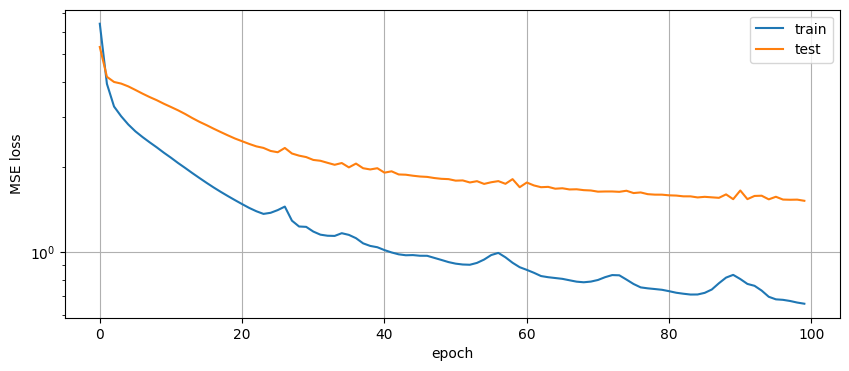

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
# plt.ylim(0.01, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()

### Autoencoder <a class="anchor" id="third-bullet"></a>

In [10]:
from data_provider.data_provider import DataProvider
from models.MLP import MLP
from trainer.Filler import Filler

from types import SimpleNamespace

In [11]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.has_predictors = False
data_kwargs.scaler = None
data_kwargs.batch_size = 50
data_kwargs.mask_length = 24*7*3
data_kwargs.mask_proba = 0.5
data_kwargs.window = 24
data_kwargs.horizon = 0

data_provider = DataProvider(data_kwargs)
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(seq_dim=data_provider.data.n_nodes, hidden_dim=int(0.25*data_provider.data.n_nodes))
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 1e-4
filler_kwargs.epochs = 100
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(MLP, model_kwargs, filler_kwargs)

device:  cpu
device:  cpu


/Users/leocatteau/Desktop/EPFL/Météo-France/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)


In [12]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)
filler.save_model('../trained_models/autoencoder.pt')

start training
Epoch 1/100, Train Loss: 7.62891078, Test Loss: 8.32732312, time: 0.23s
Epoch 2/100, Train Loss: 6.11209655, Test Loss: 6.72988796, time: 0.41s
Epoch 3/100, Train Loss: 5.31297028, Test Loss: 5.84613514, time: 0.58s
Epoch 4/100, Train Loss: 4.91204679, Test Loss: 5.40695953, time: 0.76s
Epoch 5/100, Train Loss: 4.70008552, Test Loss: 5.16884597, time: 0.96s
Epoch 6/100, Train Loss: 4.57850420, Test Loss: 5.03032891, time: 1.13s
Epoch 7/100, Train Loss: 4.49345374, Test Loss: 4.94731983, time: 1.31s
Epoch 8/100, Train Loss: 4.40924537, Test Loss: 4.88195499, time: 1.48s
Epoch 9/100, Train Loss: 4.30950040, Test Loss: 4.81017367, time: 1.65s
Epoch 10/100, Train Loss: 4.21818370, Test Loss: 4.76677148, time: 1.82s
Epoch 11/100, Train Loss: 4.13314962, Test Loss: 4.72714408, time: 1.99s
Epoch 12/100, Train Loss: 4.04202962, Test Loss: 4.66677523, time: 2.16s
Epoch 13/100, Train Loss: 3.94460219, Test Loss: 4.58789221, time: 2.34s
Epoch 14/100, Train Loss: 3.85330278, Test Lo

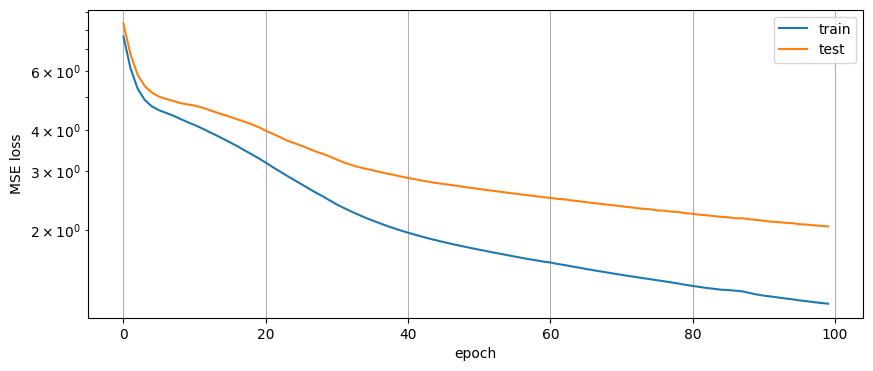

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
# plt.ylim(0.01, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()

### GRIN <a class="anchor" id="fourth-bullet"></a>

In [6]:
from data_provider.data_provider import DataProvider
from models.GRIN import GRINet
from trainer.Filler import Filler

from types import SimpleNamespace

device:  cpu


/Users/leocatteau/Desktop/EPFL/Météo-France/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)
/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/umap/plot.py:894: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


device:  cpu


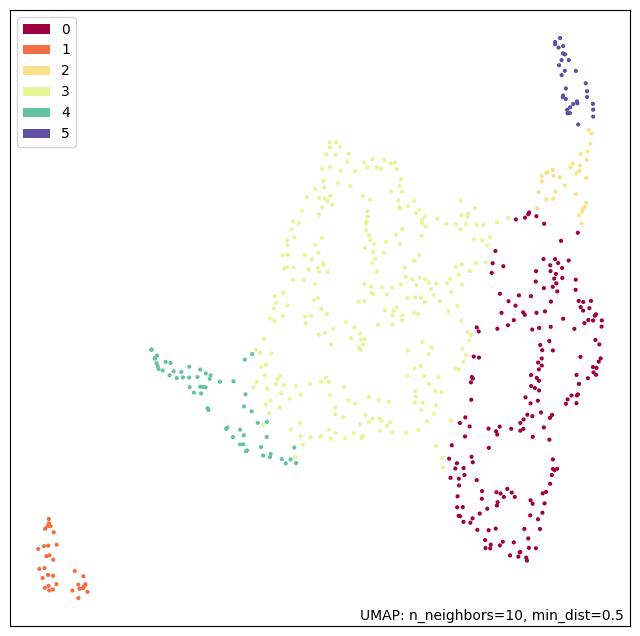

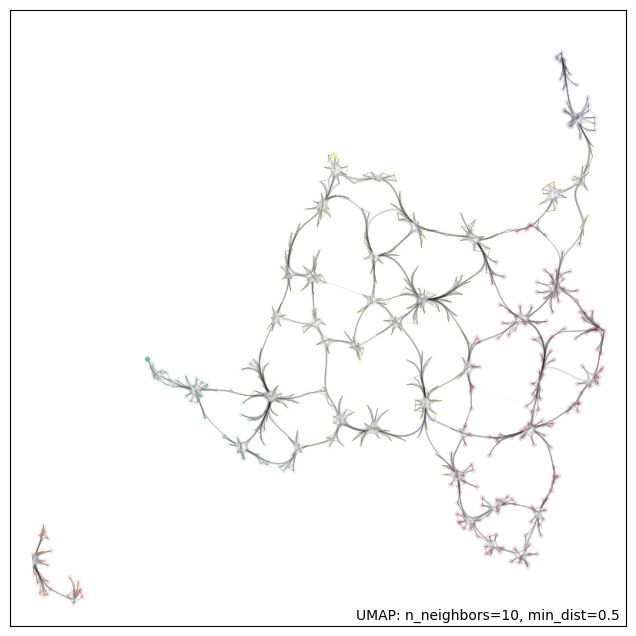

In [7]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.scaler = None
data_kwargs.batch_size = 100
data_kwargs.window = 24*2
data_kwargs.horizon = 0
data_kwargs.mask_proba = 0.5
data_kwargs.mask_length = 24*7*1

data_provider = DataProvider(data_kwargs)
adjacency_matrix = data_provider.data.umap_adjacency(threshold=0.99, verbose=True)
ordered_indices = scipy.sparse.csgraph.reverse_cuthill_mckee(graph=scipy.sparse.csr_matrix(adjacency_matrix), symmetric_mode=True)
adjacency_matrix = torch.tensor(adjacency_matrix[ordered_indices, :][:, ordered_indices]).to('cuda:0' if torch.cuda.is_available() else 'cpu')
#adjacency_matrix = torch.FloatTensor(data_provider.data.correlation_adjacency())
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(adj=adjacency_matrix, d_in=1)
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 1e-5
filler_kwargs.epochs = 10
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(GRINet, model_kwargs, filler_kwargs)

In [8]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)

start training


: 

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
plt.ylim(0, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()